In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_excel('WTP.xlsx', sheet_name='2022',header=1)

In [5]:
pH = df.iloc[:368, 8:9]

In [6]:
pH

,Unnamed: 8
0,Finish (OL)
1,6.87
2,0
3,7.14
4,6.49
...,...
363,7.44
364,7.18
365,7.1
366,NaN


In [7]:
turbidity = df.iloc[:368, 25:26]

In [8]:
turbidity

,Unnamed: 25
0,Finish (OL)
1,0.703
2,0
3,0.602
4,0.589
...,...
363,0.292
364,0.53
365,0.464
366,NaN


In [9]:
chlorine = df.iloc[:368,12:13]

In [10]:
chlorine

,Unnamed: 12
0,Sample
1,1.91
2,0
3,1.91
4,1.88
...,...
363,2.08
364,2.02
365,1.93
366,NaN


In [11]:
pH = pH.drop(0)
chlorine = chlorine.drop(0)
turbidity = turbidity.drop(0)


In [12]:
pH

,Unnamed: 8
1,6.87
2,0
3,7.14
4,6.49
5,6.37
...,...
363,7.44
364,7.18
365,7.1
366,NaN


In [13]:
pH.dropna(inplace = True)
chlorine.dropna(inplace = True)
turbidity.dropna(inplace = True)

In [14]:
pH

,Unnamed: 8
1,6.87
2,0
3,7.14
4,6.49
5,6.37
...,...
361,7.49
362,7.28
363,7.44
364,7.18


In [15]:
chlorine

,Unnamed: 12
1,1.91
2,0
3,1.91
4,1.88
5,1.93
...,...
361,2.01
362,2.05
363,2.08
364,2.02


In [16]:
turbidity

,Unnamed: 25
1,0.703
2,0
3,0.602
4,0.589
5,0.336
...,...
361,0.684
362,0.306
363,0.292
364,0.53


In [22]:
X = pd.concat([turbidity, chlorine], axis=1)
y = pH

In [23]:
X

,Unnamed: 25,Unnamed: 12
1,0.703,1.91
2,0,0
3,0.602,1.91
4,0.589,1.88
5,0.336,1.93
...,...,...
361,0.684,2.01
362,0.306,2.05
363,0.292,2.08
364,0.53,2.02


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [26]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.9314510057650244

In [27]:
import matplotlib.pyplot as plt

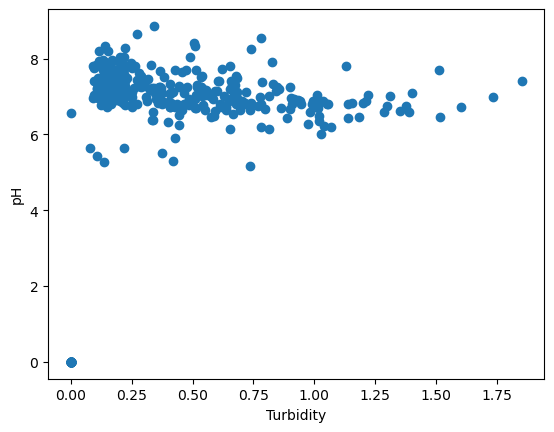

In [28]:
plt.scatter(turbidity, pH)
plt.xlabel('Turbidity')
plt.ylabel('pH')
plt.show()

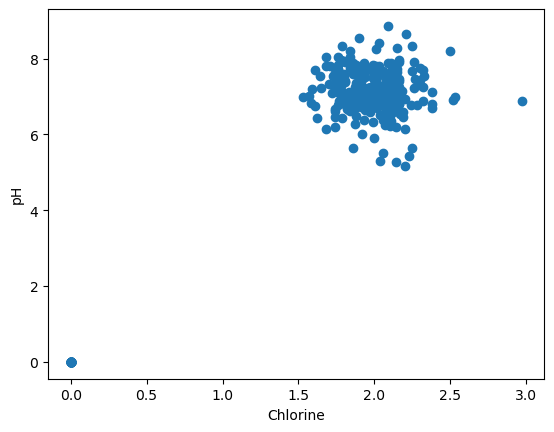

In [29]:
plt.scatter(chlorine, pH)
plt.xlabel('Chlorine')
plt.ylabel('pH')
plt.show()

In [34]:
turbidity_input = 0.703
chlorine_input = 1.91

In [35]:
input_df = pd.DataFrame({'turbidity': [turbidity_input], 'chlorine': [chlorine_input]})

In [36]:
pH_prediction = model.predict(input_df)

C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- chlorine
- turbidity
Feature names seen at fit time, yet now missing:
- Unnamed: 12
- Unnamed: 25

  warnings.warn(message, FutureWarning)


In [37]:
print("The predicted pH value is:", pH_prediction[0])

The predicted pH value is: 6.79
